# Modeling Non-Linearities

linear models are simple to describe, implement and interpret

But: have significant limitations in terms of predictive power

Ridge Regression, Lasso, PCR and others try to reduce variance of estimates, but still model linearities

**Non-Linear Models:**
    - Polynomial Regression
    
    - Step Functions
    
    - Regression Splines

## Polynomial Regression

consider the following linear model

$$ y_i = \beta_0 + \beta_1 x_i +\epsilon_i $$

a corresponding Polynomial models would be

$$ y_i = \beta_0 + \beta_1 x_i + \beta_1 x_i + \beta_2 x_i^2 +\dots + \beta_d x_i^d +\epsilon_i $$

Hence, Polynomial Regression allows for extremly non-linear curves

### Computation of SE and CI for Polynomial Regression

think of a model

$$ \hat{f}(x_0) = \hat{\beta}_0 + \hat{\beta}_1 x_i + \hat{\beta}_2 x_i + \hat{\beta}_3 x_i^2 + \hat{\beta}_4 x_i^3 $$

estimation uses least squares and the variance is

$$ Var(\hat{f}(x_0)) = l_0'\hat{C}l_0 $$

Where $l_0' = (1,x_0,x_0^2,x_0^3)$ and $\hat{C}$ is the $4 \times 4$ covarite matrix.

From least squares models we know that

$$ SE = \sqrt{Var(\hat{f}(x_0))} $$

$$ CI \approx \hat{f}(x_0) \pm 2*SE $$

### Logistic Polynomial Regression

$$ Pr(y_i>250|x_i) = \frac{exp\{\beta_0 + \beta_1 x_i + \beta_1 x_i + \beta_2 x_i^2 +\dots + \beta_d x_i^d\}} {1+exp\{\beta_0 + \beta_1 x_i + \beta_1 x_i + \beta_2 x_i^2 +\dots + \beta_d x_i^d\}} $$

same estimation as in standard Logistic Regression approach

## Step Functions

**Idea:** 
break the range of $X$ into different bins $\Rightarrow$ fit a different constant in each bin

**Procedure:**
 1. create cutpoints $c_1,c_2,\dots,c_k$ in the range of $X$
 
 2. create $k+1$ Dummy Variables $$C_{k-1}=I(C_{k-1}\leq X < C_k)$$ with $C_i \in \{0,1\}\quad ,\forall i$ and $\sum_{i=1}^k C_i(x)=1 \quad ,\forall x$
 
 3. fit a linear model using least squares $$y_i=\beta_0+\beta_1 C_1(x_i) + \beta_2 C_2(x_i) + \dots + \beta_k C_k(x_i) + \epsilon_i$$ 
 
again step functions can be performed using Logistic Regressions
 
### What is the problem with Step Functions?

unsless there are natural breakpoints, step functions can miss action (e.g. increasing linear trends)

## Basis Functions

**Idea:** 
use any function/ transformation of $X$ in $b(X)$ such that

$$y_i=\beta_0+\beta_1 b_1(x_i) + \beta_2 b_2(x_i) + \dots + \beta_k b_k(x_i) + \epsilon_i$$ 

Note: Polynomial Regression and Step-functions where special cases of basis functions

 * $b_j(x_i)=x_i^j$
 
 * $b_j(x_i)=I(C_j \leq x_i <C_{j+1})$
 
we can apply all tools available for least squares estimation, Inference, etc.

## Regression Splines

**Idea:**
piecewise polynomial regression with fitting the polynomial on different regions of $X$ (like a combination of polynomial regression and step functions)

$$
y_i= 
\begin{cases}
\beta_{01}+\beta_{11} x_i + \beta_{21} x_i^2 + \dots + \beta_{d1} x_i^d + \epsilon_i \quad , x_i<c \\
\beta_{02}+\beta_{12} x_i + \beta_{22} x_i^2 + \dots + \beta_{d2} x_i^d + \epsilon_i \quad , x_i\geq c 
\end{cases}
$$

Thresholds are called knots, more knots $\Rightarrow$ more flexible piecewise polynomial

![](splines.png "cubic regression spline with different constraints")

The figure above shows a cubic regression spline with different constraints. Top right, is unconstrained, while top left requires continuity at the threshold. The bottom left enforces smoothness at the threshold, by requiring first and second derivatives to be continuous (thus, we do not have the V-shaped look at the threshold as in top right).

**Spline Basis Representation:**

Let's stick with the example above, representing a cubic regression spline with knot (threshold) at $\xi$. 

To ensure smoothness, we constraint our spline to be continuous at $f(\xi)$, $f'(\xi)$ and $f''(\xi)$. This can be done by adding a *tunkated power basis* function per knot.

$$ h(x,\xi)=
\begin{cases}
(x-\xi)_+^3 \quad, x>\xi \\
0 \qquad, otherwise
\end{cases}
$$

Thus the $d-1$ in our case ($3-1=2$) derivates are continuous (due to the power of $3$). 

The Spline (bottom left) is respresented as:

$$ y_i=\beta_0 +\beta_1 x_i +\beta_2 x_i^2 +\beta_3 x_i^3 +\beta_4 h(x_i,\xi) +\epsilon_i $$

**natural Spline**
regression spline with additional boundary constraints (function is required to be linear at the boundary)

### Where to place knots?

 - more knots $\Rightarrow$ more flexible function
 
 - at points where the function needs to be flexible 
 
 - *often place knots uniformly*
 
### How many knots should we use?

**apply CV:**
 1. remove portion of data
 
 2. fit spline with certain number on knots
 
 3. make predictions

 4. repeat until each set was used for training
 
 5. calculate RSS
 
 6. repeat with different number of knots and compare!
 
### Comparing Polynomials and Splines

Regression Splines often give superior results to polynomial regressions.

 - polynomials need high degree to be flexible
 
 - splines introduce flexibility by increasing knots and keep degree fixed
 
**generally Regression Splines produce more stable estimates!**

## Exercises

Consider the following data generating process in which we have n observations and one covariate X covariates additional to a constant. $X \sim N_p(0, \sigma^2)$. $\beta' = (1, 1.5, −1.5, 1.5)$ and the errors are drawn from a normal distribution $\epsilon \sim N (0, 1)$. The model is generated by $y_i = \beta_0 + \beta_1 x_i + \beta_2 x_i^2 + \beta_3 x_i^3 + \epsilon_i$.

In [7]:
rm(list=ls())
library(boot) # Bootstrap

## DGP
# Simulating OLS samples and plot the regression lines
set.seed(123)
# Two explanatory variables plus an intercept:
N         <- 200
X.1       <- rep(1, N)
X.2      <- rnorm(N, mean=0, sd=1) # (pseudo) random numbers form a normal distr
X         <- cbind(X.1, X.2,X.2^2,X.2^3)
# Homoscedastic error term
eps       <-rnorm(N,0,10)# 
beta.vec  <- c(1,1.5,-1.5,1.5)
y         <- X %*% beta.vec + eps

a) Calculate the analytical standard errors for the polynomial specification above (as presented in the lecture) and use these to calculate the approximate confidence intervals as $2*SE$ for each value of $X$ you consider.

X.1,0.6712096
X.2,0.1842706
,-0.7513726
,1.7823084


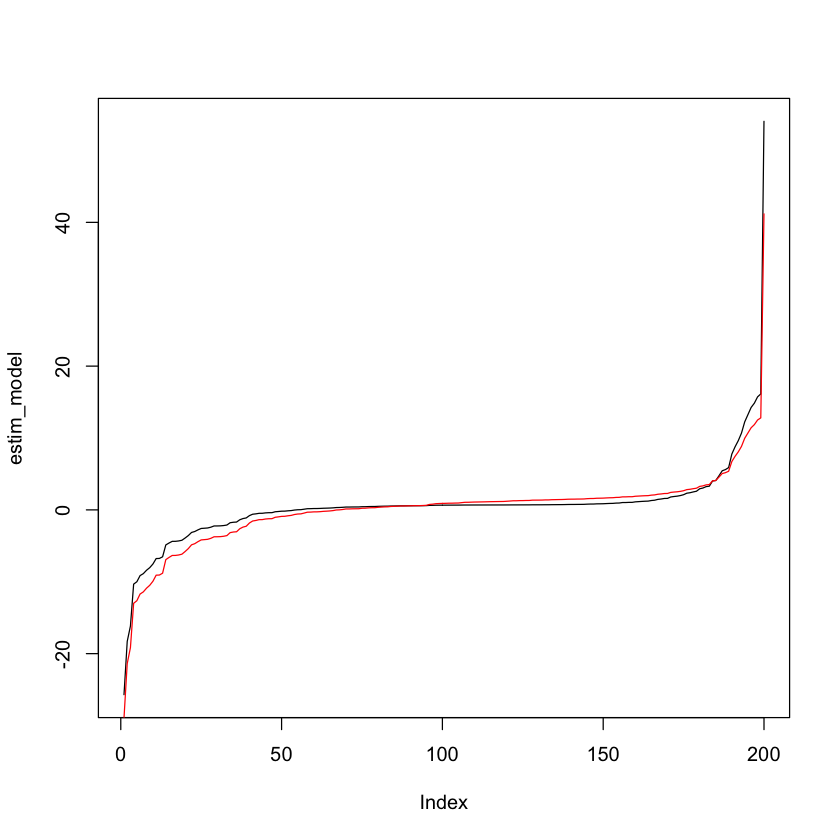

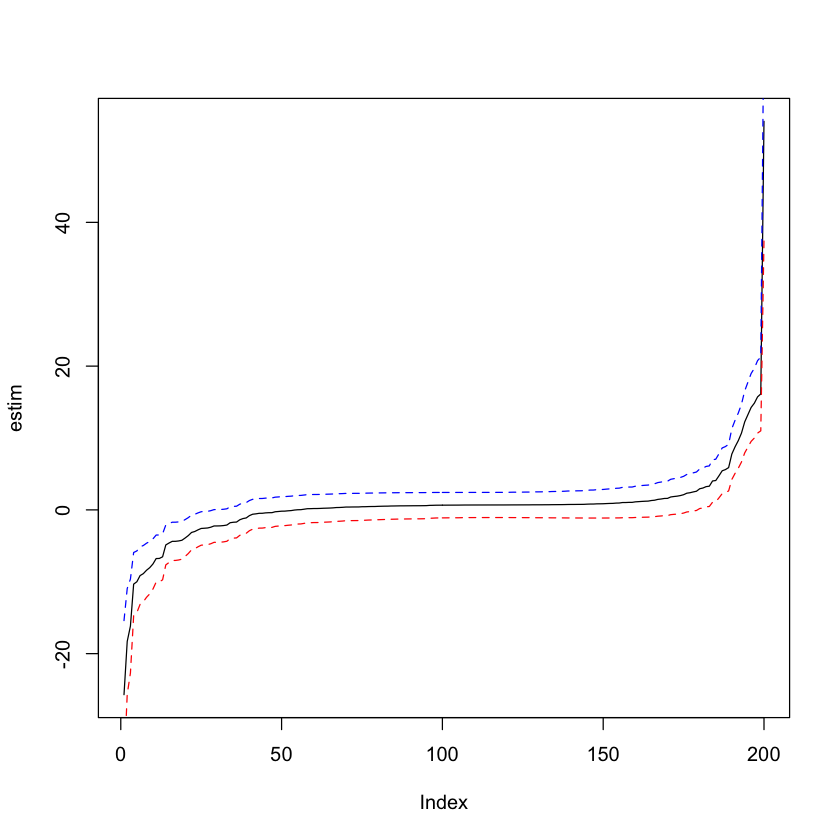

In [8]:
## computing SE and CI by relying on 2*SE
# Solving for beta hat
beta.hat <- solve(t(X) %*% X) %*% t(X) %*% y
beta.hat
x.grid<-sort(X.2) #
true_model<-beta.vec[1]+beta.vec[2]*x.grid+beta.vec[3]*x.grid^2+beta.vec[4]*x.grid^3
estim_model<-beta.hat[1]+beta.hat[2]*x.grid+beta.hat[3]*x.grid^2+beta.hat[4]*x.grid^3
plot(estim_model,type="l")
lines(true_model,type="l",lty=1,col="red")
y.hat<- X %*% beta.hat 
eps.hat<-y-X %*% beta.hat
se<-(t(eps.hat)%*%(eps.hat))/(N-5)
cov<-se[1]*solve(t(X) %*% X)
new_data<-X[order(X[,2]),]
var<-c()
for(i in 1:N)
{
  var[i]=t(new_data[i,])%*%cov%*%(new_data[i,])
}
d<-2*(sqrt(var))
estim<-beta.hat[1]+beta.hat[2]*new_data[,2]+beta.hat[3]*new_data[,2]^2+beta.hat[4]*new_data[,2]^3
conf_low<-estim-d
conf_high<-estim+d
plot(estim,type="l")
lines(conf_low,lty=2,col="red")
lines(conf_high,lty=2,col="blue")

b) Calculate the naive bootstrap confidence intervals for B bootstrap draws from the original data, such that the nominal coverage for the two methods is the same.

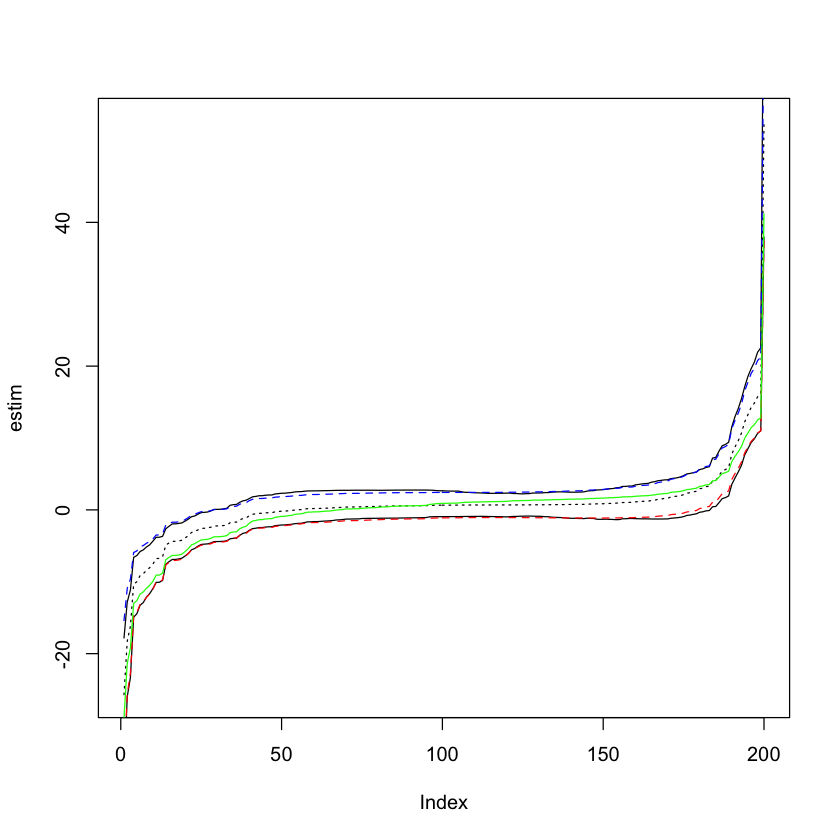

In [41]:
## computing Bootstraped CI's
B=200
b_sample<-matrix(NA,N,B)
beta.hat<-matrix(NA,length(X),B)
data<-cbind(y,X)
function_B<-matrix(NA,length(x.grid),B)
for(i in 1:B)
{
  XB<- data[sample(nrow(data),replace=T, N), ]
  beta.hat<-solve(t(XB[,2:5]) %*% XB[,2:5]) %*% t(XB[,2:5]) %*%XB[,1]
  function_B[,i]<-beta.hat[1]+beta.hat[2]*x.grid+beta.hat[3]*x.grid^2+beta.hat[4]*x.grid^3
}
#plot(function_B[,1])
#plot(function_B[,2])
sorted<-t(apply(function_B,1,sort))
# Calculate the empirical quantiles
conf_highB<-sorted[,195]
conf_lowB<-sorted[,5]
plot(estim,type="l",lty=3)
lines(conf_highB)
lines(conf_lowB)
lines(conf_low,lty=2,col="red")
lines(conf_high,lty=2,col="blue")
lines(true_model,col="green")

c) Calculate the coverage probability at four different values of X, chosen by you.

In [40]:
## computing Coverage Probabilities
cov_prob_B<-true_model>conf_lowB&true_model<conf_highB
paste('Coverage Probability of B: ', sum(cov_prob_B)/length(x.grid))
cov_prob_A<-true_model>conf_low&true_model<conf_high
paste('Coverage Probability of A: ', sum(cov_prob_A)/length(x.grid))

[1] "Coverage Probability of B:  1"

[1] "Coverage Probability of A:  1"

d) Calculate the interval length at four different values of X.

In [37]:
## comupting interval length
int_lengthB<-conf_highB-conf_lowB
int_length<-conf_high-conf_low
paste('The number of times the bootstrapped interval length is larger than the analytical one:')
sum(int_lengthB/int_length>1)

[1] "The number of times the bootstrapped interval length is larger than the analytical one"

[1] 123

**Simulation Study**

Evaluate the two types of confidence intervals above along two dimensions: interval length and coverage probability.

a) Calculate both for a small simulation study of 100 repetitions.

[1] "Coverage Probability, analytical standard errors:      0.977"

[1] "Coverage Probability:                                                   0.853"

[1] "Interval length ratio sum, if >0.5*N:                            4.6"

[1] "avg Interval length:                                                      5.1511839661951"

[1] "avg Interval length (B):                                                4.19292867155301"

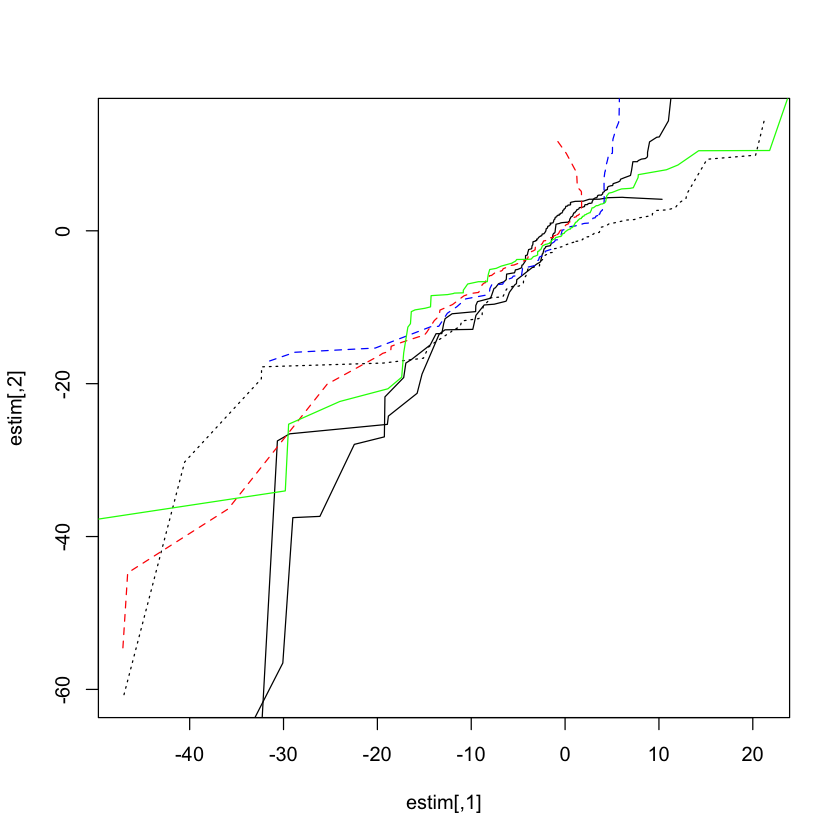

In [93]:
### Simulation Study to check different methods given a certain DGP process
data.conf<-function(model,N)
{
  ## Simulating OLS samples and plot the regression lines
  #set.seed(123)
  # Two explanatory variables plus an intercept:
  #N         <- 200
  X.1       <- rep(1, N)
  X.2      <- rnorm(N, mean=0, sd=1) #(pseudo) random numbers form a normal distr
  X         <- cbind(X.1, X.2,X.2^2,X.2^3)
  # Error term
  if(model==1)
  {
    eps       <-rnorm(N,0,10)# 
  }
  if(model==2)
  {
    eps       <-rgamma(N,0.1,0.01)
    eps<-scale(eps, scale = FALSE)
  }
  if(model==3)
  {
    eps       <-(X.2^2)*rnorm(N,0,10)# 
  }
  ## Different distribution
  if(model==4)
  {
    # Sample N random uniforms U
    U =runif(N)
    # Variable to store the samples from the mixture distribution                                             
    eps = rep(NA,N)
    # Sampling from the mixture
    for(i in 1:N){
      if(U[i]<.3){
        eps[i] = rnorm(1,-5.9,1)
      }else if(U[i]<.8){
        eps[i] = rnorm(1,4.1,1)
      }else{
        eps[i] = rnorm(1,-1.9,.1)
      }
    }
  }
  # Density plot of the random samples
  #plot(density(eps),main="Density Estimate of the Mixture Model")
  ####################################################################
  if(model==5)
  {
    eps       <-  rt(N, df=1)# 
  }
  
  #plot(density(eps),main="Density Estimate of the t-distribution")
  
  
  if(model==6)
  {
    # Sample N random uniforms U
    
    # Variable to store the samples from the mixture distribution                                             
    eps =  runif(N,-1,1)
    # Sampling from the mixture
  }
  
  ## Heteroscedastic error term
  beta.vec  <- c(1,1.5,-1.5,1.5)
  y         <- X %*% beta.vec + eps
  # Solving for beta hat
  beta.hat <- solve(t(X) %*% X) %*% t(X) %*% y
  beta.hat
  x.grid<-sort(X.2) #seq(min(X.2),max(X.2),le=N)
  true_model<-beta.vec[1]+beta.vec[2]*x.grid+beta.vec[3]*x.grid^2+beta.vec[4]*x.grid^3
  estim_model<-beta.hat[1]+beta.hat[2]*x.grid+beta.hat[3]*x.grid^2+beta.hat[4]*x.grid^3
  #plot(estim_model,type="l")
  #lines(true_model,type="l",lty=1,col="red")
  #Calculate the covariance matrix
  #calculate the fitted values
  y.hat<- X %*% beta.hat 
  eps.hat<-y-X %*% beta.hat
  #calculate the covariance matrix
  se<-(t(eps.hat)%*%(eps.hat))/(N-5)
  cov<-se[1]*solve(t(X) %*% X)
  new_data<-X[order(X[,2]),]
  #new_data<-x.grid
  var<-c()
  for(i in 1:N)
  {
    var[i]=t(new_data[i,])%*%cov%*%(new_data[i,])
  }
  d<-2*(sqrt(var))
  estim<-beta.hat[1]+beta.hat[2]*new_data[,2]+beta.hat[3]*new_data[,2]^2+beta.hat[4]*new_data[,2]^3
  conf_low<-estim-d
  conf_high<-estim+d
  #plot(estim,type="l")
  #lines(conf_low,lty=2,col="red")
  #lines(conf_high,lty=2,col="blue")
  ## Bootstrapped confidence intervals
  B=N
  b_sample<-matrix(NA,N,B)
  beta.hat<-matrix(NA,length(X),B)
  data<-cbind(y,X)
  function_B<-matrix(NA,length(x.grid),B)
  
  for(i in 1:B)
  {
    XB<- data[sample(nrow(data),replace=T, N), ]
    beta.hat<-solve(t(XB[,2:5]) %*% XB[,2:5]) %*% t(XB[,2:5]) %*%XB[,1]
    function_B[,i]<-beta.hat[1]+beta.hat[2]*x.grid+beta.hat[3]*x.grid^2+beta.hat[4]*x.grid^3
  }
  #plot(function_B[,1])
  #plot(function_B[,2])
  sorted<-t(apply(function_B,1,sort)) 
  # Calculate the empirical quantiles
  conf_highB<-sorted[,B*0.95]
  conf_lowB<-sorted[,B*0.05]
  ###########################################
  #plot(estim,type="l",lty=3)
  #lines(conf_highB)
  #lines(conf_lowB)
  #lines(conf_low,lty=2,col="red")
  #lines(conf_high,lty=2,col="blue")
  #lines(true_model,col="green")
  ## Calculate the coverage probabilities
  cov_prob_B<-true_model>conf_lowB&true_model<conf_highB
  ratio1_B= sum(cov_prob_B)/length(x.grid)
  cov_prob_A<-true_model>conf_low&true_model<conf_high
  ratio1=sum(cov_prob_A)/length(x.grid)
  ## Calculate interval length
  int_lengthB<-conf_highB-conf_lowB
  int_length<-conf_high-conf_low
  ratio2=sum(int_lengthB/int_length>1)
  ratio2_int=mean(int_length)
  ratioB_int=mean(int_lengthB)
  return(list(ratio2=ratio2,ratio1_B=ratio1_B,ratio1=ratio1,ratio2_int=ratio2_int,ratioB_int=ratioB_int,conf_high=conf_high,conf_low=conf_low,conf_highB=conf_highB,conf_lowB=conf_lowB,true_model=true_model,estim=estim))
}
##########
reps<-5
result_1<-replicate(reps,data.conf(model=1,N=200)$ratio1)
result_1B<-replicate(reps,data.conf(model=1,N=200)$ratio1_B)
result_2<-replicate(reps,data.conf(model=1,N=200)$ratio2)
result_int<-replicate(reps,data.conf(model=1,N=200)$ratio2_int)
result_int_B<-replicate(reps,data.conf(model=1,N=200)$ratioB_int)
conf_highB<-replicate(reps,data.conf(model=1,N=200)$conf_highB)
conf_lowB<-replicate(reps,data.conf(model=1,N=200)$conf_lowB)
conf_low<-replicate(reps,data.conf(model=1,N=200)$conf_low)
conf_high<-replicate(reps,data.conf(model=1,N=200)$conf_high)
true_model<-replicate(reps,data.conf(model=1,N=200)$true_model)
estim<-replicate(reps,data.conf(model=1,N=200)$estim)
plot(estim,type="l",lty=3)
  lines(conf_highB)
  lines(conf_lowB)
  lines(conf_low,lty=2,col="red")
  lines(conf_high,lty=2,col="blue")
  lines(true_model,col="green")
# cov.prob, analytical standard errors
paste('Coverage Probability, analytical standard errors:     ', mean(result_1))
# cov_ probability, 
paste('Coverage Probability:                                                  ',mean(result_1B))
# interval length ratio sum, if >0.5*N: 
paste('Interval length ratio sum, if >0.5*N:                           ',mean(result_2))
# avg.interval_length
paste('avg Interval length:                                                     ',mean(result_int))
# avg.interval_length
paste('avg Interval length (B):                                               ',mean(result_int_B))

b) How could you change the data-generating process to give a competitive advantage to the bootstrap?
Suggest two changes and check each in a simulation study.

[1] "Coverage Probability, analytical standard errors:      1"

[1] "Coverage Probability:                                                   0.911"

[1] "Interval length ratio sum, if >0.5*N:                            14.4"

[1] "avg Interval length:                                                      14.9543608346696"

[1] "avg Interval length (B):                                                12.7272621321964"

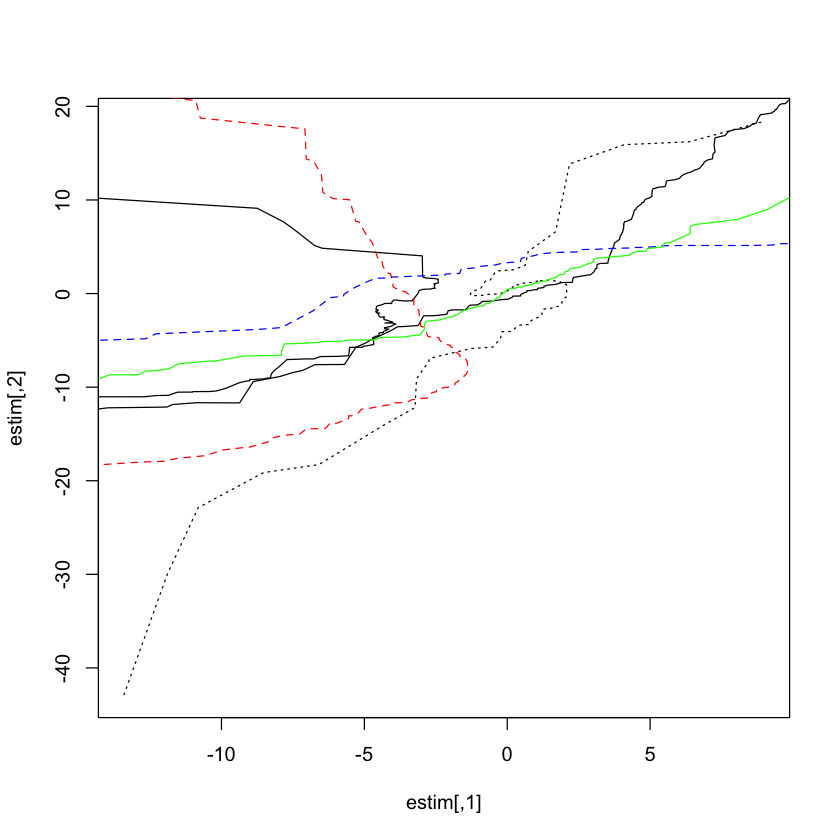

In [92]:
## for the  gamma
result_1<-replicate(reps,data.conf(model=2,N=200)$ratio1)
result_1B<-replicate(reps,data.conf(model=2,N=200)$ratio1_B)
result_2<-replicate(reps,data.conf(model=2,N=200)$ratio2)
result_int<-replicate(reps,data.conf(model=2,N=200)$ratio2_int)
result_int_B<-replicate(reps,data.conf(model=2,N=200)$ratioB_int)
conf_highB<-replicate(reps,data.conf(model=2,N=200)$conf_highB)
conf_lowB<-replicate(reps,data.conf(model=2,N=200)$conf_lowB)
conf_low<-replicate(reps,data.conf(model=2,N=200)$conf_low)
conf_high<-replicate(reps,data.conf(model=2,N=200)$conf_high)
true_model<-replicate(reps,data.conf(model=2,N=200)$true_model)
estim<-replicate(reps,data.conf(model=2,N=200)$estim)
plot(estim,type="l",lty=3)
  lines(conf_highB)
  lines(conf_lowB)
  lines(conf_low,lty=2,col="red")
  lines(conf_high,lty=2,col="blue")
  lines(true_model,col="green")
# cov.prob, analytical standard errors
paste('Coverage Probability, analytical standard errors:     ', mean(result_1))
# cov_ probability, 
paste('Coverage Probability:                                                  ',mean(result_1B))
# interval length ratio sum, if >0.5*N: 
paste('Interval length ratio sum, if >0.5*N:                           ',mean(result_2))
# avg.interval_length
paste('avg Interval length:                                                     ',mean(result_int))
# avg.interval_length
paste('avg Interval length (B):                                               ',mean(result_int_B))

[1] "Coverage Probability, analytical standard errors:      0.837"

[1] "Coverage Probability:                                                   0.8657"

[1] "Interval length ratio sum, if >0.5*N:                            84.36"

[1] "avg Interval length:                                                      8.16757151916691"

[1] "avg Interval length (B):                                                10.6080151647802"

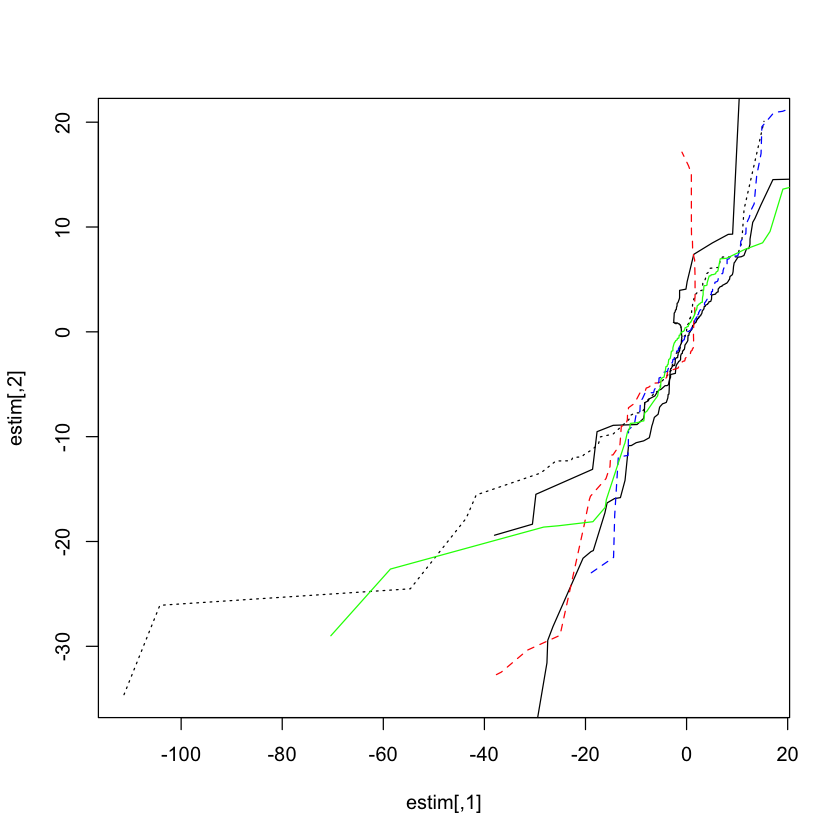

In [61]:
## For the heteroscedastic errors
result_1<-replicate(reps,data.conf(model=3,N=200)$ratio1)
result_1B<-replicate(reps,data.conf(model=3,N=200)$ratio1_B)
result_2<-replicate(reps,data.conf(model=3,N=200)$ratio2)
result_int<-replicate(reps,data.conf(model=3,N=200)$ratio2_int)
result_int_B<-replicate(reps,data.conf(model=3,N=200)$ratioB_int)
conf_highB<-replicate(reps,data.conf(model=3,N=200)$conf_highB)
conf_lowB<-replicate(reps,data.conf(model=3,N=200)$conf_lowB)
conf_low<-replicate(reps,data.conf(model=3,N=200)$conf_low)
conf_high<-replicate(reps,data.conf(model=3,N=200)$conf_high)
true_model<-replicate(reps,data.conf(model=3,N=200)$true_model)
estim<-replicate(reps,data.conf(model=3,N=200)$estim)
plot(estim,type="l",lty=3)
  lines(conf_highB)
  lines(conf_lowB)
  lines(conf_low,lty=2,col="red")
  lines(conf_high,lty=2,col="blue")
  lines(true_model,col="green")
# cov.prob, analytical standard errors
paste('Coverage Probability, analytical standard errors:     ', mean(result_1))
# cov_ probability, 
paste('Coverage Probability:                                                  ',mean(result_1B))
# interval length ratio sum, if >0.5*N: 
paste('Interval length ratio sum, if >0.5*N:                           ',mean(result_2))
# avg.interval_length
paste('avg Interval length:                                                     ',mean(result_int))
# avg.interval_length
paste('avg Interval length (B):                                               ',mean(result_int_B))

[1] "Coverage Probability, analytical standard errors:      0.9152"

[1] "Coverage Probability:                                                   0.905"

[1] "Interval length ratio sum, if >0.5*N:                            1.9"

[1] "avg Interval length:                                                      2.23344084161603"

[1] "avg Interval length (B):                                                1.89256677949333"

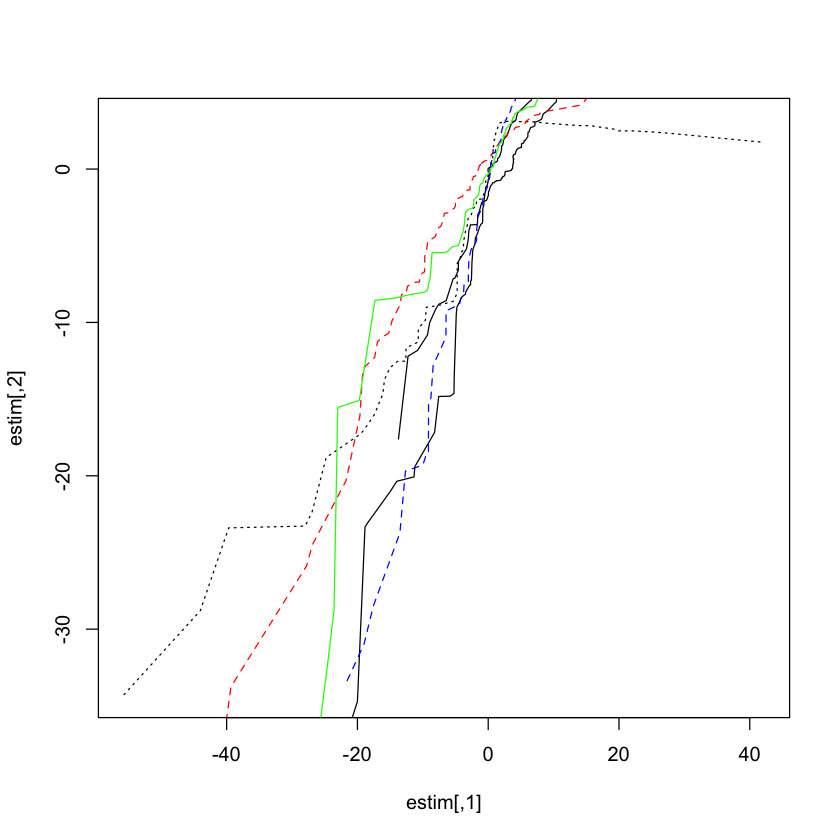

In [62]:
## For the mixture model
result_1<-replicate(reps,data.conf(model=4,N=200)$ratio1)
result_1B<-replicate(reps,data.conf(model=4,N=200)$ratio1_B)
result_2<-replicate(reps,data.conf(model=4,N=200)$ratio2)
result_int<-replicate(reps,data.conf(model=4,N=200)$ratio2_int)
result_int_B<-replicate(reps,data.conf(model=4,N=200)$ratioB_int)
conf_highB<-replicate(reps,data.conf(model=4,N=200)$conf_highB)
conf_lowB<-replicate(reps,data.conf(model=4,N=200)$conf_lowB)
conf_low<-replicate(reps,data.conf(model=4,N=200)$conf_low)
conf_high<-replicate(reps,data.conf(model=4,N=200)$conf_high)
true_model<-replicate(reps,data.conf(model=4,N=200)$true_model)
estim<-replicate(reps,data.conf(model=4,N=200)$estim)
plot(estim,type="l",lty=3)
  lines(conf_highB)
  lines(conf_lowB)
  lines(conf_low,lty=2,col="red")
  lines(conf_high,lty=2,col="blue")
  lines(true_model,col="green")
# cov.prob, analytical standard errors
paste('Coverage Probability, analytical standard errors:     ', mean(result_1))
# cov_ probability, 
paste('Coverage Probability:                                                  ',mean(result_1B))
# interval length ratio sum, if >0.5*N: 
paste('Interval length ratio sum, if >0.5*N:                           ',mean(result_2))
# avg.interval_length
paste('avg Interval length:                                                     ',mean(result_int))
# avg.interval_length
paste('avg Interval length (B):                                               ',mean(result_int_B))

[1] "Coverage Probability, analytical standard errors:      0.9608"

[1] "Coverage Probability:                                                   0.8916"

[1] "Interval length ratio sum, if >0.5*N:                            5.66"

[1] "avg Interval length:                                                      0.288482792259183"

[1] "avg Interval length (B):                                                0.239802086815956"

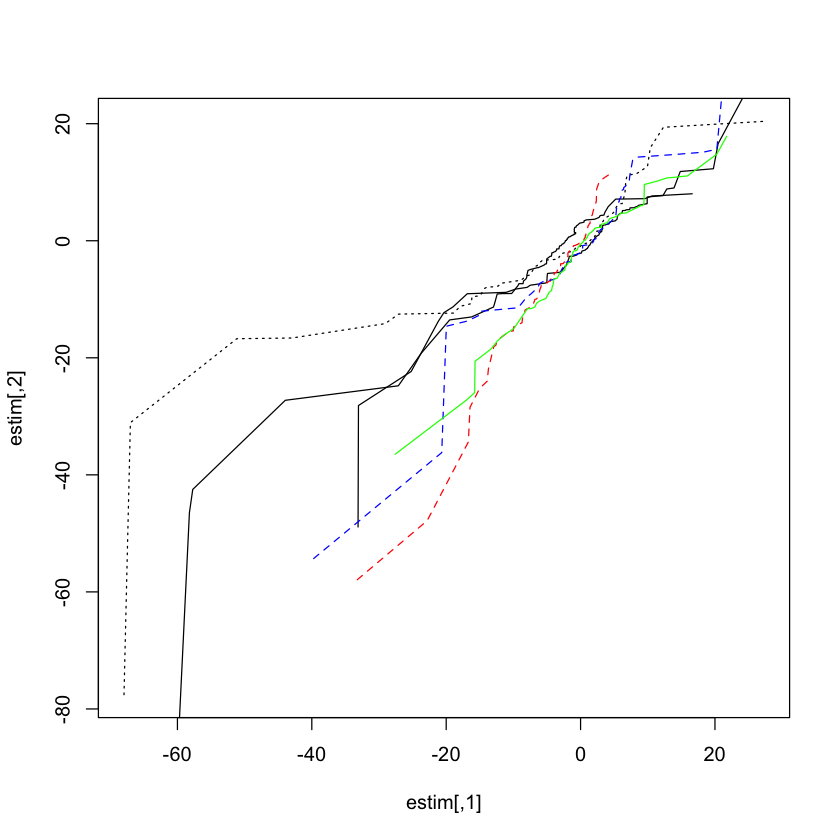

In [63]:
## For the t distribution
result_1<-replicate(reps,data.conf(model=6,N=200)$ratio1)
result_1B<-replicate(reps,data.conf(model=6,N=200)$ratio1_B)
result_2<-replicate(reps,data.conf(model=6,N=200)$ratio2)
result_int<-replicate(reps,data.conf(model=6,N=200)$ratio2_int)
result_int_B<-replicate(reps,data.conf(model=6,N=200)$ratioB_int)
conf_highB<-replicate(reps,data.conf(model=6,N=200)$conf_highB)
conf_lowB<-replicate(reps,data.conf(model=6,N=200)$conf_lowB)
conf_low<-replicate(reps,data.conf(model=6,N=200)$conf_low)
conf_high<-replicate(reps,data.conf(model=6,N=200)$conf_high)
true_model<-replicate(reps,data.conf(model=6,N=200)$true_model)
estim<-replicate(reps,data.conf(model=6,N=200)$estim)
plot(estim,type="l",lty=3)
  lines(conf_highB)
  lines(conf_lowB)
  lines(conf_low,lty=2,col="red")
  lines(conf_high,lty=2,col="blue")
  lines(true_model,col="green")
# cov.prob, analytical standard errors
paste('Coverage Probability, analytical standard errors:     ', mean(result_1))
# cov_ probability, 
paste('Coverage Probability:                                                  ',mean(result_1B))
# interval length ratio sum, if >0.5*N: 
paste('Interval length ratio sum, if >0.5*N:                           ',mean(result_2))
# avg.interval_length
paste('avg Interval length:                                                     ',mean(result_int))
# avg.interval_length
paste('avg Interval length (B):                                               ',mean(result_int_B))